In [1]:
! pip install nltk
! pip install stopwords

In [2]:
#Importing warning library to avoid any warnings
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
import pandas as pd
df=pd.read_csv('Ratings_Data.csv') 
df  #Checking the dataset

,Unnamed: 0,Product_Review,Ratings
0,0,Value for money\n5 star rating\nExcellent came...,5
1,1,Really satisfied with the Product I received.....,5
2,2,Amazing phone with great cameras and better ba...,5
3,3,Great iPhone very snappy experience as apple k...,5
4,4,Previously I was using one plus 3t it was a gr...,5
...,...,...,...
1895,1895,A very good product. Simple to set up. I had t...,5
1896,1896,I needed to create a WiFi setup for small offi...,4
1897,1897,its very easy interface to work with and i str...,5
1898,1898,Honest rating for this product is 5/5 . Just f...,4


In [4]:
#We can see that Unnamed:0 is just the index number.lets drop that column
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.shape    #Checking the dimensions of the dataset

(1900, 2)

# Dataset Description

### Ratings Prediction

We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating. So, we have to build an application which can predict the rating by seeing the review.

### Data Collection Phase:

You have to scrape at least 20000 rows of data. You can scrape more data as well, it’s up to you. More the data better the model In this section you need to scrape the reviews of different laptops, Phones, Headphones, smart watches, Professional Cameras, Printers, monitors, Home theater, router from different e-commerce websites. Basically, we need these columns-

1) reviews of the product.

2) rating of the product. 

You can fetch other data as well, if you think data can be useful or can help in the project. It completely depends on your imagination or assumption. 

Hint: – Try fetching data from different websites. If data is from different websites, it will help our model to remove the effect of over fitting.

-> Try to fetch an equal number of reviews for each rating, for example if you are fetching 10000 reviews then all ratings 1,2,3,4,5 should be 2000. It will balance our data set.

-> Convert all the ratings to their round number, as there are only 5 options for rating i.e., 1,2,3,4,5. If a rating is 4.5 convert it 5.

### Model Building Phase:

After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model. Follow the complete life cycle of data science. Include all the steps like-

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Preprocessing

4. Model Building

5. Model Evaluation

6. Selecting the best model

# Data pre-processing

In [6]:
#Checking for null values 
df.isnull().sum()

Product_Review    0
Ratings           0
dtype: int64

In [7]:
#We can handle missing data by filling them with 'No Review' using fillna()
df['Product_Review'].fillna('No review',inplace=True)

In [8]:
df.isnull().sum()  #Checking after filling them

Product_Review    0
Ratings           0
dtype: int64

In [9]:
df.info()   #Checking the datatype of all the columns present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_Review  1900 non-null   object
 1   Ratings         1900 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.8+ KB


In [10]:
#Checking the average rating given by the users
avg = df['Ratings'].mean()
Avg = round(avg,1)
print("Average rating given by users is " + str(Avg))

Average rating given by users is 4.6


In [11]:
#Checking the value counts of the rating
df['Ratings'].value_counts()

5    1314
4     467
3     119
Name: Ratings, dtype: int64

# Data Visualization

In [12]:
#Importing Matplotlib and Seaborn
import seaborn as sns
import matplotlib.pyplot as plt

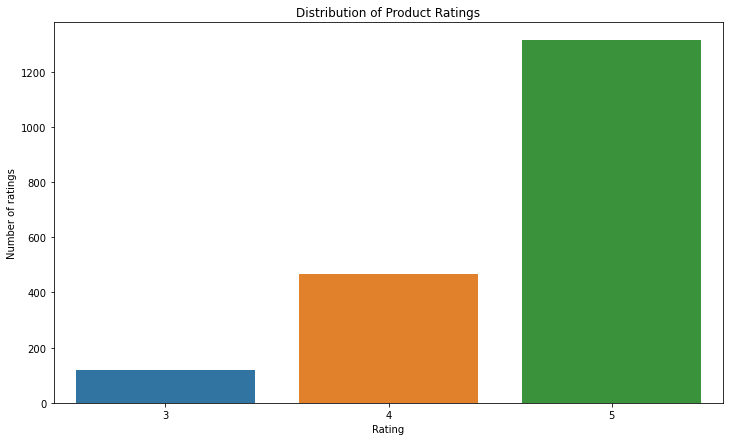

In [13]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Ratings'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

-> 5 has been given the maximum ratings by the users, followed by 1, 4, 3 and 2

# Preprocessing using NLP

The steps involved are:

- Removing Punctuations and other special characters
- Splitting the comments into individual words
- Removing Stop Words
- Stemming and Lemmatising
- Applying Count Vectoriser
- Splitting dataset into Training and Testing

In [14]:
#Importing required libraries
import re # for regex
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

In [15]:
def clean_text(df, df_column_name):
    
    #Converting all messages to lowercase
    df[df_column_name] = df[df_column_name].str.lower()

    #Replace email addresses with 'email'
    df[df_column_name] = df[df_column_name].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

    #Replace URLs with 'webaddress'
    df[df_column_name] = df[df_column_name].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

    #Replace money symbols with 'dollars' (£ can by typed with ALT key + 156)
    df[df_column_name] = df[df_column_name].str.replace(r'£|\$', 'dollars')
      
    #Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    df[df_column_name] = df[df_column_name].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

    #Replace numbers with 'numbr'
    df[df_column_name] = df[df_column_name].str.replace(r'\d+(\.\d+)?', 'numbr')

    #Remove punctuation
    df[df_column_name] = df[df_column_name].str.replace(r'[^\w\d\s]', ' ')

    #Replace whitespace between terms with a single space
    df[df_column_name] = df[df_column_name].str.replace(r'\s+', ' ')

    #Remove leading and trailing whitespace
    df[df_column_name] = df[df_column_name].str.replace(r'^\s+|\s+?$', '')
    
    #Remove stopwords
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'â', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    df[df_column_name] = df[df_column_name].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [16]:
#Calling the class
clean_text(df, 'Product_Review')
df['Product_Review'].tail(3)

1897    easy interface work strrrrrrrrrrongly recomded...
1898    honest rating product numbr numbr fully satisf...
1899    bought numbr little guys shop numbr sqft numbr...
Name: Product_Review, dtype: object

In [17]:
#Tokenizing the data using RegexpTokenizer
from nltk.tokenize import RegexpTokenizer
tokenizer=RegexpTokenizer(r'\w+')
df['Product_Review'] = df['Product_Review'].apply(lambda x: tokenizer.tokenize(x.lower()))
df.head()

,Product_Review,Ratings
0,"[value, money, numbr, star, rating, excellent,...",5
1,"[really, satisfied, product, received, totally...",5
2,"[amazing, phone, great, cameras, better, batte...",5
3,"[great, iphone, snappy, experience, apple, kin...",5
4,"[previously, using, one, plus, numbrt, great, ...",5


In [18]:
# Lemmatizing and then Stemming with Snowball to get root words and further reducing characters
stemmer = SnowballStemmer("english")
import gensim
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

#Tokenize and Lemmatize
def preprocess(text):
    result=[]
    for token in text:
        if len(token)>=3:
            result.append(lemmatize_stemming(token))
            
    return result

In [19]:
#Processing review with above Function
processed_review = []

for doc in df.Product_Review:
    processed_review.append(preprocess(doc))
    
print(len(processed_review))
processed_review[:3]

1900


[['valu',
  'money',
  'numbr',
  'star',
  'rat',
  'excel',
  'camera',
  'batteri',
  'backup',
  'full',
  'day',
  'singl',
  'charg',
  'tougher',
  'water',
  'resist',
  'design',
  'glossi',
  'back',
  'screen',
  'excel',
  'bright',
  'contrast',
  'appl',
  'anumbr',
  'bionic',
  'fastest',
  'smartphon',
  'chip',
  'planet',
  'excel',
  'batteri',
  'life',
  'fast',
  'charg',
  'support',
  'stereo',
  'speaker',
  'great',
  'qualiti'],
 ['realli',
  'satisfi',
  'product',
  'receiv',
  'total',
  'genuin',
  'packag',
  'also',
  'realli',
  'good',
  'plan',
  'buy'],
 ['amaz',
  'phone',
  'great',
  'camera',
  'better',
  'batteri',
  'give',
  'best',
  'perform',
  'love',
  'camera']]

In [20]:
df['clean_review']=processed_review  #Assigning this to the dataframe
df.head()

,Product_Review,Ratings,clean_review
0,"[value, money, numbr, star, rating, excellent,...",5,"[valu, money, numbr, star, rat, excel, camera,..."
1,"[really, satisfied, product, received, totally...",5,"[realli, satisfi, product, receiv, total, genu..."
2,"[amazing, phone, great, cameras, better, batte...",5,"[amaz, phone, great, camera, better, batteri, ..."
3,"[great, iphone, snappy, experience, apple, kin...",5,"[great, iphon, snappi, experi, appl, kind, upg..."
4,"[previously, using, one, plus, numbrt, great, ...",5,"[previous, use, one, plus, numbrt, great, phon..."


In [21]:
df['Product_Review'] = df['clean_review'].apply(lambda x:' '.join(y for y in x))
df.head()

,Product_Review,Ratings,clean_review
0,valu money numbr star rat excel camera batteri...,5,"[valu, money, numbr, star, rat, excel, camera,..."
1,realli satisfi product receiv total genuin pac...,5,"[realli, satisfi, product, receiv, total, genu..."
2,amaz phone great camera better batteri give be...,5,"[amaz, phone, great, camera, better, batteri, ..."
3,great iphon snappi experi appl kind upgrad iph...,5,"[great, iphon, snappi, experi, appl, kind, upg..."
4,previous use one plus numbrt great phone decid...,5,"[previous, use, one, plus, numbrt, great, phon..."


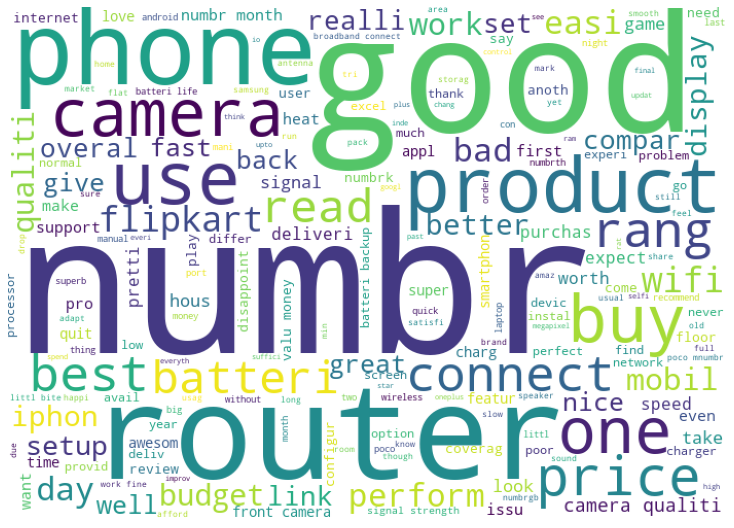

In [39]:
#Getting sense of words in Rating 1
one = df['Product_Review'][df['Ratings']==1.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8))
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

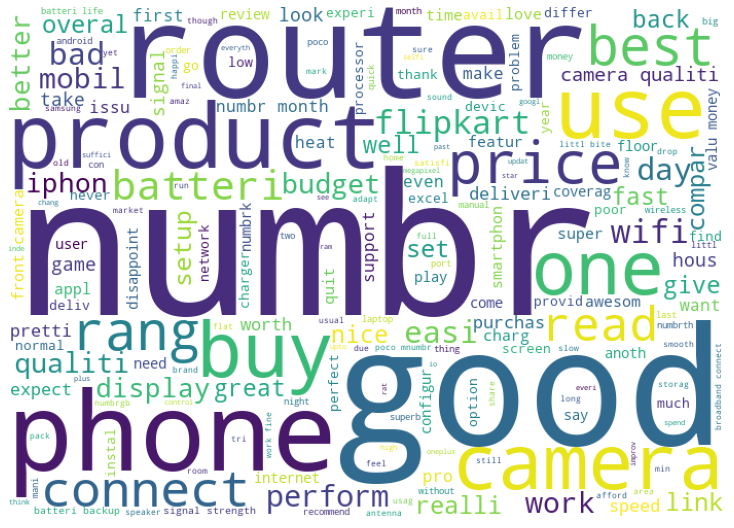

In [37]:
#Getting sense of words in Rating 2
one = df['Product_Review'][df['Ratings']==2.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8))
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

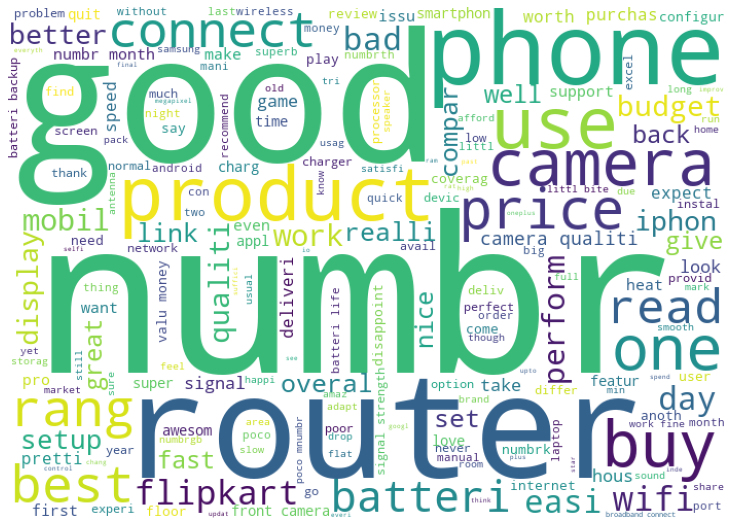

In [29]:
#Getting sense of words in Rating 3
one = df['Product_Review'][df['Ratings']==3.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8))
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

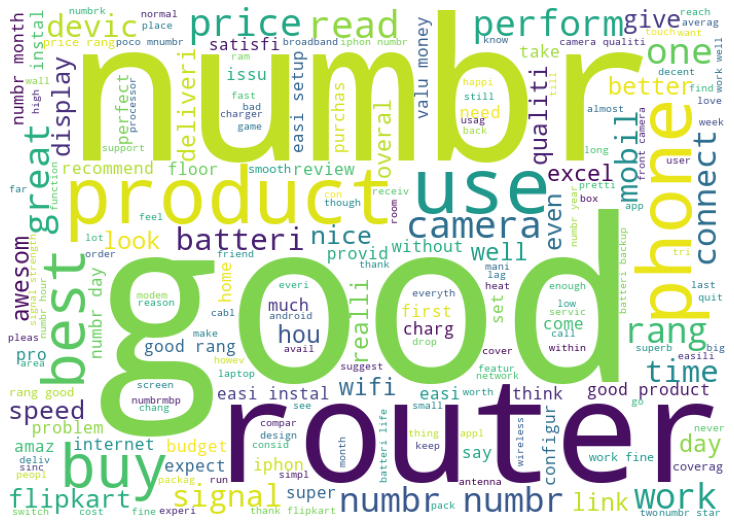

In [30]:
#Getting sense of words in Rating 4
one = df['Product_Review'][df['Ratings']==4.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8))
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

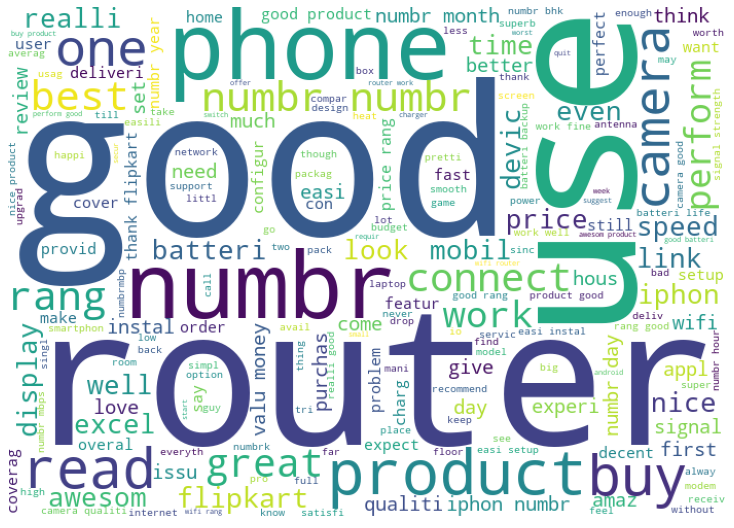

In [31]:
#Getting sense of words in Rating 5
one = df['Product_Review'][df['Ratings']==5.0]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(one))

plt.figure(figsize=(10,8))
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Observations:

-> The enlarged texts are the most number of words used there and small texts are the less number of words used.

-> It varies according to the ratings.

# Feature Extraction

In [ ]:
#Converting text into numeric using TfidfVectorizer
#create object
tf = TfidfVectorizer()

#fitting 
features = tf.fit_transform(df['Product_Review'])
x=features
y=df[['Ratings']]

In [ ]:
x.shape

In [ ]:
y.shape

# Model building

In [ ]:
#Importing train_test_split, Logistic Regression and accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def max_acc_score(reg,x,y):
    max_score=0
    for r_state in range (42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
        reg.fit(x_train,y_train)
        pred=reg.predict(x_test)
        acc_score=accuracy_score(y_test,pred)
        print("The accuracy score at r_state", r_state, "is", acc_score)
        if acc_score>max_score:
            max_score=acc_score
            final_r_state=r_state
    print("The maximum accuracy score", max_score, "is achieved at", final_r_state)
    return max_score

In [ ]:
LR=LogisticRegression()
max_acc_score(LR,x,y)

In [ ]:
#Creating train_test_split using best random_state
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=.20)

# Finding out the best model

In [ ]:
#Importing various classification models for testing
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Initializing the instance of the model
LR=LogisticRegression()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier()
knc=KNeighborsClassifier()
rfc=RandomForestClassifier()
abc=AdaBoostClassifier()
gbc=GradientBoostingClassifier()

In [ ]:
models= []
models.append(('Logistic Regression',LR))
models.append(('MultinomialNB',mnb))
models.append(('DecisionTreeClassifier',dtc))
models.append(('KNeighborsClassifier',knc))
models.append(('RandomForestClassifier',rfc))
models.append(('AdaBoostClassifier',abc))
models.append(('GradientBoostingClassifier',gbc))

In [ ]:
#Importing required modules and metrices
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
#Making a for loop and calling the algorithm one by one and save data to respective model using append function
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('******************************',name,'***************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('accuracy_score: ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='accuracy').mean()
    print('cross_val_score: ',sc)
    cvs.append(sc*100)
    print('\n')
    print('Classification report:\n ')
    print(classification_report(y_test,pre))
    print('\n')
    print('Confusion matrix: \n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n\n\n')

In [ ]:
#Finalizing the result
result=pd.DataFrame({'Model':Model, 'Accuracy_score': score,'Cross_val_score':cvs})
result

We can see that Random Forest and Gradient Boosting algorithms are performing well. Now we will try Hyperparameter Tuning to find out the best parameters and try to increase the scores.

# Hyperparameter Tuning

In [ ]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=76)   #Using the best random state we obtained
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     #Printing the best parameters obtained
print(rfc.best_score_)      #Mean cross-validated score of best_estimator

In [ ]:
#Using the best parameters obtained
rfc=RandomForestClassifier(random_state=76,n_estimators=100)
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(rfc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

In [ ]:
#GradientBoostingClassifier
parameters={'n_estimators':[1,10,100]}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
gbc=GradientBoostingClassifier(random_state=76)   #Using the best random state we obtained
gbc=GridSearchCV(gbc,parameters,cv=3,scoring='accuracy')
gbc.fit(x_train,y_train)
print(gbc.best_params_)     #Printing the best parameters obtained
print(gbc.best_score_)      #Mean cross-validated score of best_estimator

In [ ]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=76,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

After applying Hyperparameter Tuning, we can see that RandomForestClassifier Algorithm is performing well as the scores are improved,i.e, accuracy score from 91.4 to 91.5 and cross_val_score from 56.344 to 56.346. Now, we will finalize Random ForestClassifier algorithm model as the final model.

# Finalizing the model

In [ ]:
rfc_prediction=rfc.predict(x)

#Making a dataframe of predictions
rating_prediction=pd.DataFrame({'Predictions':rfc_prediction})
rating_prediction

# Saving the model

In [ ]:
#Saving the model
import pickle
filename='RatingsPrediction_Project.pkl'   #Specifying the filename
pickle.dump(rfc,open(filename,'wb'))  

In [ ]:
#Saving predicted values
rating_prediction.to_csv('RatingsPrediction_DataResults.csv')

# Conclusion

-> After the completion of this project, we got an insight of how to collect data, preprocessing the data, analyzing the data and building a model.

-> First, we collected the reviews and ratings data from different e-commerce websites like Amazon and Flipkart and it was done by using Webscraping. The framework used for webscraping was Selenium, which has an advantage of automating our process of collecting data.

-> We collected almost 50000 of data which contained the ratings from 1.0 to 5.0 and their reviews.

-> Then, the scrapped data was combined in a single dataframe and saved in a csv file so that we can open it and analyze the data.

-> We did the preprocessing using NLP and the steps are as follows:

- Removing Punctuations and other special characters

- Splitting the comments into individual words

- Removing Stop Words

- Stemming and Lemmatising

- Applying Count Vectoriser

- Splitting dataset into Training and Testing

-> After separating our train and test data, we started running different machine learning classification algorithms to find out the best performing model.

-> We found that RandomForest and GradienBoosting Algorithms were performing well, according to their accuracy and cross val scores.

-> Then, we performed Hyperparameter Tuning techniques using GridSearchCV for getting the best parameters and improving the scores. In that, RandomForestClassifier performed well and we finalised that model.

-> We saved the model in pkl format and then saved the predicted values in a csv format.

-> The problems we faced during this project were:

- More time consumption during hyperparameter tuning for both models, as the data was large.

- Less number of parameters were used during tuning.

- Scrapping of data from different websites were of different process and the length of data were differing in most cases.

- Some of the reviews were bad and the text had more wrong information about the product.

- WordCloud was not showing proper text which had more positive and negative weightage.

-> Areas of improvement:

- Less time complexity

- More computational power can be given

- More accurate reviews can be given

- Less errors can be avoided.